Than this exercise, I want to review if the outliers have any influence in the results.
Also, we will perform build a cnn model for the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LassoCV


# Concatenation the five metacritic datasets

In [ ]:
# upload all different files of meta data
df0 =pd.read_csv('Meta_vg_0.csv')
df1 =pd.read_csv('Meta_vg_1.csv')
df2 =pd.read_csv('Meta_vg_2.csv')
df3 =pd.read_csv('Meta_vg_3.csv')
df4 =d.read_csv('Meta_vg_4.csv')
# chage release date to be only year of release
df0['Year'] = pd.DatetimeIndex(df0['Year']).year
df1['Year'] = pd.DatetimeIndex(df1['Year']).year
df2['Year'] = pd.DatetimeIndex(df2['Year']).year
df3['Year'] = pd.DatetimeIndex(df3['Year']).year
df4['Year'] = pd.DatetimeIndex(df4['Year']).year

# concatenate all different files of metacritics and remove duplicate rows
df = pd.concat([df0,df1,df2, df3, df4]).drop_duplicates(subset = ['Name', 'Platform', 'Year']).reset_index(drop=True)

# change non numeric values in Meta_Scor and User_Score columns to NaN and then drop line with NaN values

df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Meta_Score'] = pd.to_numeric(df['Meta_Score'], errors='coerce')
    
# drop rows with Nan values 
df.dropna( inplace= True)

# save final file to csv file
df.to_csv('Meta_vg.csv',sep=',', encoding='utf-8', index=False)
(df.Name=='WII SPORTS').sum()

# Merge the original Vgame_sales with metacritic dataset

In [ ]:
# upload the meta critic data

meta =pd.read_csv('Meta_vg.csv')
# upload the vedio game sales data

vgsl = pd.read_csv('vgsales.csv')
# Standarize the values the Name and Platform columns to Upper letters

meta["Name"] = meta["Name"].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8').str.upper()
vgsl["Name"] = vgsl["Name"].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8').str.upper()

meta["Platform"] = meta["Platform"].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8').str.upper()
vgsl["Platform"] = vgsl["Platform"].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8').str.upper()

# merge all rows in both dataset with similar Name, Platform, and Year

vg_meta = vgsl.merge(meta, how='inner', left_on=['Name', 'Platform','Year'], right_on=['Name', 'Platform','Year']).drop_duplicates(subset = ['Name', 'Platform', 'Year'])

# drop rows with NaN value
vg_meta.dropna(inplace=True)
vg_meta.to_csv('VG_Meta_Score.csv',sep=',', encoding='utf-8', index=False)


In [34]:
df = pd.read_csv('VG_Meta_Score.csv')
print(df.shape)
df.head()

(5044, 13)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Meta_Score,User_Score
0,1,WII SPORTS,WII,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76,8.1
1,3,MARIO KART WII,WII,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82,8.4
2,4,WII SPORTS RESORT,WII,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80,8.2
3,7,NEW SUPER MARIO BROS.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89,8.5
4,9,NEW SUPER MARIO BROS. WII,WII,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,87,8.3


## Data cleaning


In [35]:
print(df.describe().T)
print(df.isnull().sum())
df.head()

               count         mean          std      min      25%      50%  \
Rank          5044.0  6211.623910  4487.369718     1.00  2347.75  5343.50   
Year          5044.0  2007.647105     4.000591  1996.00  2005.00  2008.00   
NA_Sales      5044.0     0.448953     1.074748     0.00     0.07     0.17   
EU_Sales      5044.0     0.272873     0.746828     0.00     0.02     0.08   
JP_Sales      5044.0     0.053872     0.251223     0.00     0.00     0.00   
Other_Sales   5044.0     0.095535     0.282226     0.00     0.01     0.03   
Global_Sales  5044.0     0.871455     2.134602     0.01     0.13     0.35   
Meta_Score    5044.0    70.925852    13.576600    17.00    63.00    73.00   
User_Score    5044.0    11.268993    15.479091     0.50     6.60     7.60   

                  75%       max  
Rank          9518.75  16580.00  
Year          2011.00   2016.00  
NA_Sales         0.45     41.49  
EU_Sales         0.25     29.02  
JP_Sales         0.01      6.50  
Other_Sales      0.09    

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Meta_Score,User_Score
0,1,WII SPORTS,WII,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76,8.1
1,3,MARIO KART WII,WII,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82,8.4
2,4,WII SPORTS RESORT,WII,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80,8.2
3,7,NEW SUPER MARIO BROS.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89,8.5
4,9,NEW SUPER MARIO BROS. WII,WII,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,87,8.3


In [36]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Meta_Score,User_Score
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000
mean,6211.623910,2007.647105,0.448953,0.272873,0.053872,0.095535,0.871455,70.925852,11.268993
std,4487.369718,4.000591,1.074748,0.746828,0.251223,0.282226,2.134602,13.576600,15.479091
min,1.000000,1996.000000,0.000000,0.000000,0.000000,0.000000,0.010000,17.000000,0.500000
25%,2347.750000,2005.000000,0.070000,0.020000,0.000000,0.010000,0.130000,63.000000,6.600000
50%,5343.500000,2008.000000,0.170000,0.080000,0.000000,0.030000,0.350000,73.000000,7.600000
75%,9518.750000,2011.000000,0.450000,0.250000,0.010000,0.090000,0.890000,81.000000,8.300000
max,16580.000000,2016.000000,41.490000,29.020000,6.500000,10.570000,82.740000,99.000000,92.000000


Add boxplots

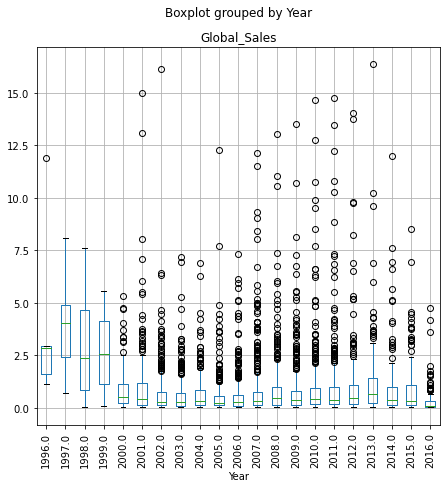

In [37]:
df.drop(df[df['Global_Sales'] > 20].index, inplace = True)
df.boxplot(column= 'Global_Sales', by='Year', figsize= (7,7))
plt.xticks(rotation=90);

In [43]:
df.Global_Sales[df['Year']==2009.0].sum()

342.66

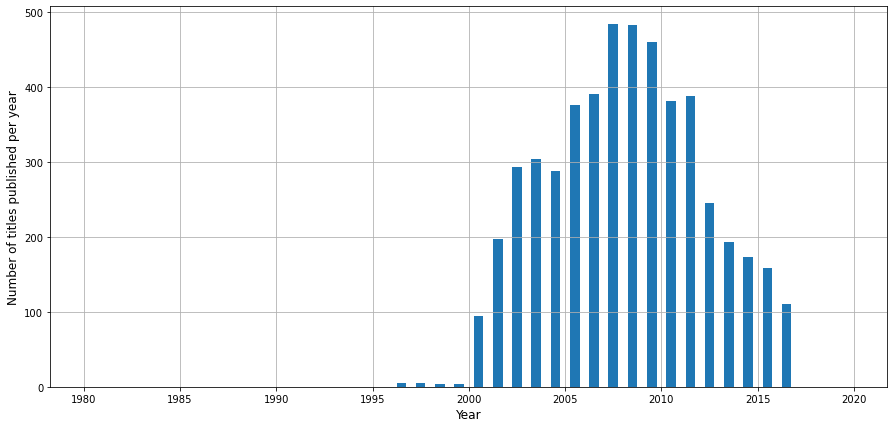

In [46]:
plt.figure(figsize=(15,7))
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of titles published per year', fontsize=12)
plt.hist(df['Year'],bins=[a for a in range(1980,2021)],rwidth=0.5)
plt.grid()
plt.show()

C:\Users\cgals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Platform', ylabel='Platform'>

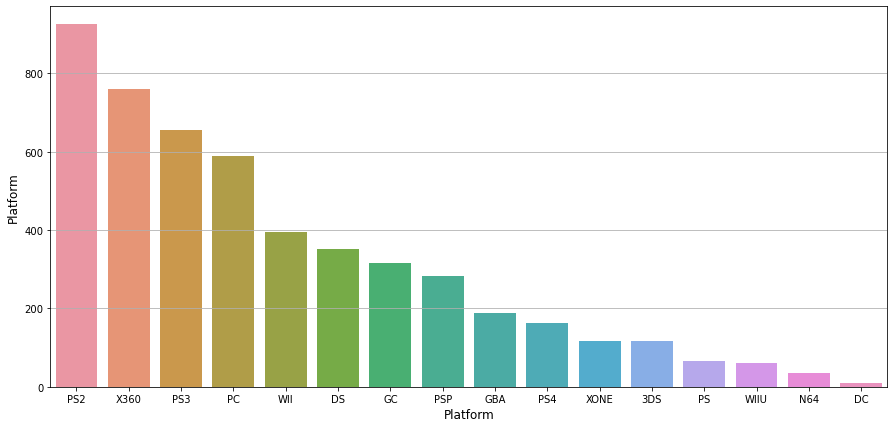

In [50]:
plt.figure(figsize=(15,7))
plt.xlabel('Platform',fontsize=12)
plt.ylabel('Number of titles published per platform', fontsize=12)
plt.grid()
sns.barplot(df['Platform'].value_counts().index, df['Platform'].value_counts(), data=df)

C:\Users\cgals\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


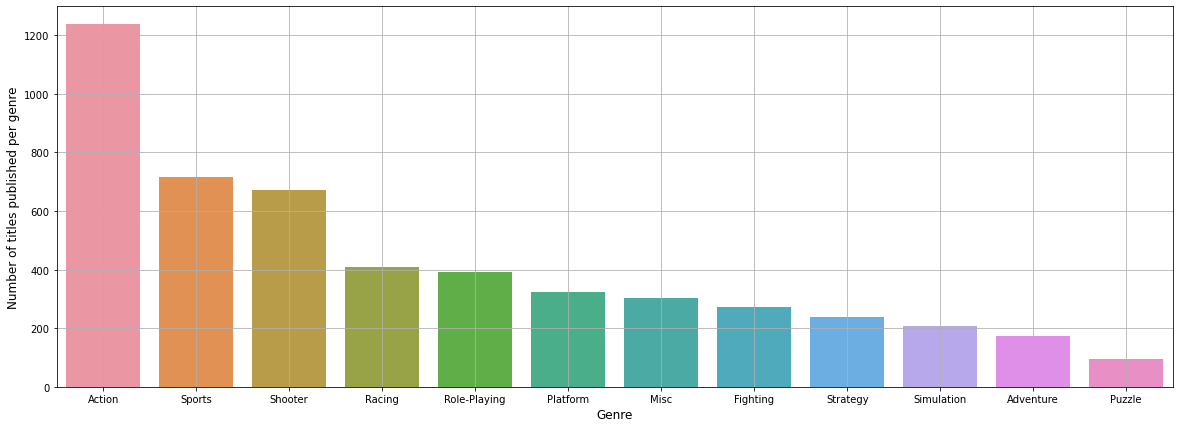

In [49]:
plt.figure(figsize=(20,7))
sns.barplot(df['Genre'].value_counts().index,df['Genre'].value_counts())
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Number of titles published per genre', fontsize=12)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid()
plt.show()


# Variables Correlation

<AxesSubplot:>

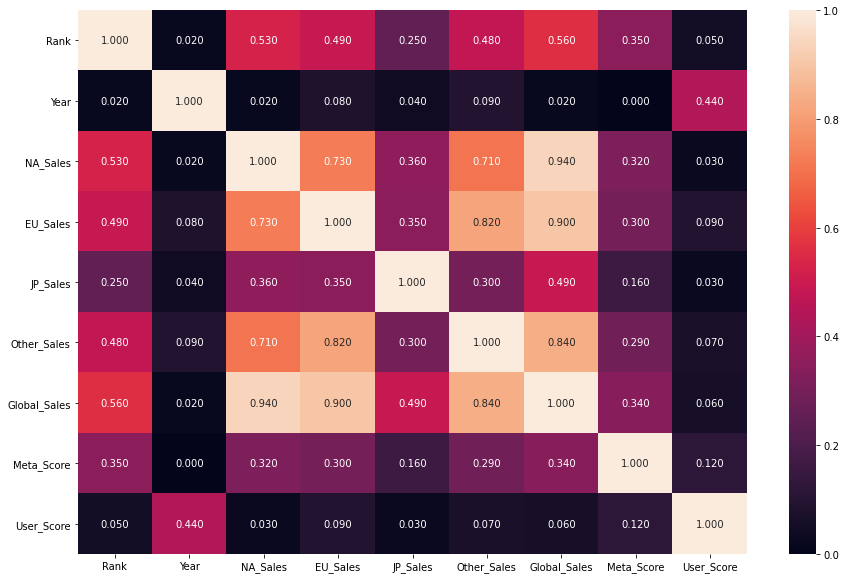

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr().abs().round(2),annot=True,fmt= '.3f')


Based on correlation heat map only the sales numbers are highly correlated with each other. 
Higher correlations between sales variables help us to understand the global nature of the video game industry, so success on one continent usually means success on another as well. This finding support selecting the Global_Sales variable to be used as a dependent variable.

In [87]:
cat_var = df.select_dtypes(exclude = np.number).columns
df[cat_var].nunique()

Name         3336
Platform       16
Genre          12
Publisher     204
dtype: int64

Now we have to deal with categorical values in our dataset. We need to change the following independent variables to dummy variables:

Platform, Genre, Publisher, and Name

However, As we can see Name and Publisher variables have so many unique values which will cause a massive influx of features. So  so we will drop these two variable and create dummies only for Platform and Genre categorical variables


In [88]:
print(df.shape) #pre-dummies shape
df1 = pd.get_dummies(data=df, columns=['Platform', 'Genre'])
print(df1.shape) #post-dummies shape
df1.head() #Check to verify that dummies are ok

(5034, 13)
(5034, 39)


,Rank,Name,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Meta_Score,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
10,24,GRAND THEFT AUTO V,2013.0,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,97,...,0,0,0,0,0,0,0,0,0,0
11,25,GRAND THEFT AUTO: VICE CITY,2002.0,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95,...,0,0,0,0,0,0,0,0,0,0
12,29,GRAN TURISMO 3: A-SPEC,2001.0,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,95,...,0,0,0,0,1,0,0,0,0,0
13,30,CALL OF DUTY: MODERN WARFARE 3,2011.0,Activision,9.03,4.28,0.13,1.32,14.76,88,...,0,0,0,0,0,0,1,0,0,0
14,32,CALL OF DUTY: BLACK OPS,2010.0,Activision,9.67,3.73,0.11,1.13,14.64,87,...,0,0,0,0,0,0,1,0,0,0


Let's now drop the variables from our model. These include:

Rank
Name
Publisher
NA_Sales
EU_Sales
JP_Sales
Other_Sales

In [89]:
df1 = df1.drop(['Rank', 'Name', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)


+ Center and reduce the numeric variables of the data frame, using an instance of the class preprocessing.StandardScaler

In [90]:
num_var = df1.select_dtypes(include=np.number).columns

scaler = StandardScaler()
df1[num_var] = pd.DataFrame(scaler.fit_transform(df1[num_var]), index = df1.index)


Let's define data and target and then split into training set (X_train, y_train) and a test set (X_test, y_test), with 20% of the original data for the test


In [91]:
target= df1.Global_Sales 
data = df1.drop('Global_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state=42)
Y_train = np.log1p(y_train)
Y_test = np.log1p(y_test)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

#Parameter grid for Gradient Boosting Regressor
param_grid_gbr = [
    {'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}]

Y_train = np.log1p(y_train)
Y_test = np.log1p(y_test)

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(n_estimators=200), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(gbr_score)))

Best parameters: {'max_depth': 5, 'max_features': 8}
Best cross-validation score: 0.55
Test set score: 0.57


In [93]:
l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)
pred_test = l_reg.predict(X_test)

print("score train :", l_reg.score(X_train, Y_train))
print("score test :", l_reg.score(X_test, Y_test))
print("mse test:", np.sqrt(mean_squared_error(pred_test, Y_test)))

score train : 0.30265479510738014
score test : 0.307159211381398
mse test: 0.495807070334269


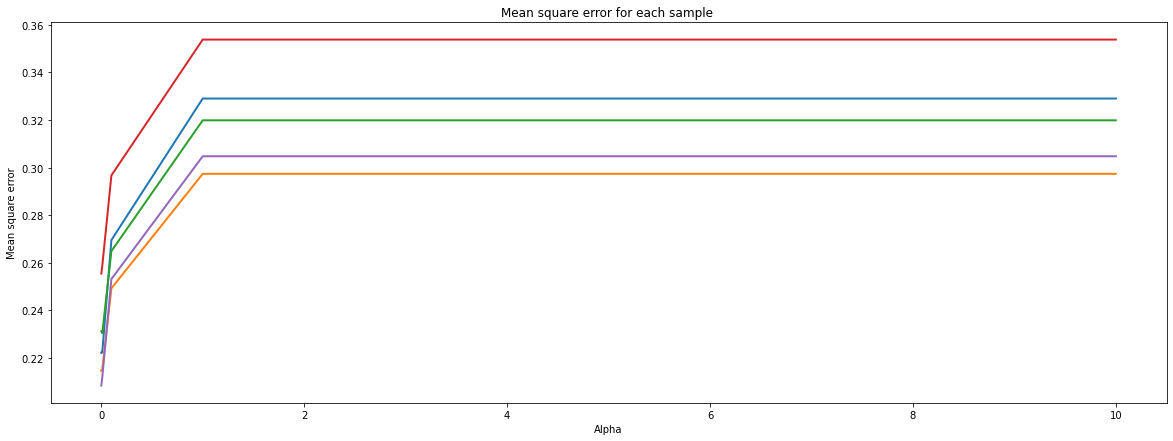

the best value of alpha is 0.0005


In [94]:
alpha = [10, 1, 0.1, 0.01, 0.001, 0.0005]
model_lasso = LassoCV(alphas=alpha, cv=5).fit(X_train, Y_train)

alphas = model_lasso.alphas_
plt.figure(figsize=(20,7))
plt.plot(alphas, model_lasso.mse_path_, '-', lw=2)

plt.xlabel('Alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error for each sample ')
plt.show()
print('the best value of alpha is',model_lasso.alpha_)

In [95]:
pred_test = model_lasso.predict(X_test)

print("score test:", model_lasso.score(X_test, Y_test))
print("mse test:", np.sqrt(mean_squared_error(pred_test, Y_test)))
print('The number of variables kept =',(model_lasso.coef_!=0).sum())
print('The number of variables eliminated =',(model_lasso.coef_==0).sum())

score test: 0.30712852965059156
mse test: 0.49581804836190774
The number of variables kept = 29
The number of variables eliminated = 2


# Change from Regression to Classification model

In [96]:
target.describe()
bin_labels_4 = [ 'Silver', 'Gold', 'Platinum', 'Diamond']

# bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
# bin_labels_10 = ['0', '1','2','3','4','5','6','7','8','9', '10','11','12','13','14']

label = pd.qcut(target, q=4, retbins = True, labels=bin_labels_4)
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, label[0], test_size= 0.2, random_state=42)


In [97]:
# Classification using LogisticRegession
lg = LogisticRegression(max_iter = 1000, n_jobs = -1)
lg.fit(X_train1, y_train1)
lg_sc=[]
lg_sc.append(lg.score(X_test1, y_test1))
lg_sc

[0.48361469712015887]

In [98]:
# Classification using SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train1, y_train1)
svm_sc=[]
svm_sc.append(svm.score(X_test1, y_test1))
svm_sc

[0.44091360476663355]

# Impact of outliers

In [99]:
df2=df[df['Year']>1999]
df2 = pd.get_dummies(data=df2, columns=['Platform', 'Genre'])
df2 = df2.drop(['Rank', 'Name', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

# normalisation
num_var = df2.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df2[num_var] = pd.DataFrame(scaler.fit_transform(df2[num_var]), index = df2.index)

label = pd.qcut(target, q=4, retbins = True, labels=bin_labels_4)
target= df2.Global_Sales 
data = df2.drop('Global_Sales', axis=1)
label = pd.qcut(target, q=4, retbins = True, labels=bin_labels_4)
# Train the model
X_train1, X_test1, y_train1, y_test1 = train_test_split(data, label[0], test_size= 0.2, random_state=42)

# L R
lg.fit(X_train1, y_train1)
lg_sc.append(lg.score(X_test1, y_test1))
print(lg_sc)


# SVM
svm.fit(X_train1, y_train1)
svm_sc.append(svm.score(X_test1, y_test1))
print(svm_sc)

[0.48361469712015887, 0.45717131474103584]
[0.44091360476663355, 0.4312749003984064]


In [106]:
for i in range (19,7,-1):

    df3=df[df['Global_Sales'] <= i]
    df3 = pd.get_dummies(data=df3, columns=['Platform', 'Genre'])
    df3 = df3.drop(['Rank', 'Name', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

    # normalisation
    num_var = df3.select_dtypes(include=np.number).columns
    scaler = StandardScaler()
    df3[num_var] = pd.DataFrame(scaler.fit_transform(df3[num_var]), index = df3.index)

    label = pd.qcut(target, q=4, retbins = True, labels=bin_labels_4)
    target= df3.Global_Sales 
    data = df3.drop('Global_Sales', axis=1)
    label = pd.qcut(target, q=4, retbins = True, labels=bin_labels_4)
    # Train the model
    X_train1, X_test1, y_train1, y_test1 = train_test_split(data, label[0], test_size= 0.2, random_state=42)

    # L R
    lg.fit(X_train1, y_train1)
    lg_sc.append(lg.score(X_test1, y_test1))
    


    # SVM
    svm.fit(X_train1, y_train1)
    svm_sc.append(svm.score(X_test1, y_test1))
    

print(lg_sc)
print(svm_sc)

[0.48361469712015887, 0.45717131474103584, 0.48361469712015887, 0.48361469712015887, 0.48361469712015887, 0.45183714001986097, 0.45183714001986097, 0.47713717693836977, 0.4646766169154229, 0.4701195219123506, 0.45363908275174475, 0.45209580838323354, 0.4485514485514486, 0.45345345345345345]
[0.44091360476663355, 0.4312749003984064, 0.44091360476663355, 0.44091360476663355, 0.44091360476663355, 0.4438927507447865, 0.4438927507447865, 0.4572564612326044, 0.46766169154228854, 0.4442231075697211, 0.4596211365902293, 0.4620758483033932, 0.46053946053946054, 0.4444444444444444]


In [108]:
label[0]

51      Diamond
52      Diamond
53      Diamond
54      Diamond
55      Diamond
         ...   
5039     Silver
5040     Silver
5041     Silver
5042     Silver
5043     Silver
Name: Global_Sales, Length: 4993, dtype: category
Categories (4, object): ['Silver' < 'Gold' < 'Platinum' < 'Diamond']

In [112]:
GSCV_score=[]
for i in range (19,7,-1):
    df4=df[df['Global_Sales'] <= i]
    df4 = pd.get_dummies(data=df4, columns=['Platform', 'Genre'])
    df4 = df4.drop(['Rank', 'Name', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)
    target= df4.Global_Sales 
    data = df4.drop('Global_Sales', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.2, random_state=42)
    Y_train = np.log1p(y_train)
    Y_test = np.log1p(y_test)

    #Parameter grid for Gradient Boosting Regressor
    param_grid_gbr = [
        {'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}]

    grid_search_gbr = GridSearchCV(GradientBoostingRegressor(n_estimators=200), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
    grid_search_gbr.fit(X_train, Y_train)
    print("Best parameters: {}".format(grid_search_gbr.best_params_))
    gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
    print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
    gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
    print(i)
    print("Test set score: {:.4f}".format(np.expm1(gbr_score)))
    GSCV_score.append(np.expm1(gbr_score))

Best parameters: {'max_depth': 5, 'max_features': 8}
Best cross-validation score: 0.42
19
Test set score: 0.4436
Best parameters: {'max_depth': 5, 'max_features': 6}
Best cross-validation score: 0.42
18
Test set score: 0.4398
Best parameters: {'max_depth': 5, 'max_features': 8}
Best cross-validation score: 0.42
17
Test set score: 0.4425
Best parameters: {'max_depth': 5, 'max_features': 6}
Best cross-validation score: 0.42
16
Test set score: 0.4356
Best parameters: {'max_depth': 5, 'max_features': 10}
Best cross-validation score: 0.42
15
Test set score: 0.4368
Best parameters: {'max_depth': 5, 'max_features': 8}
Best cross-validation score: 0.42
14
Test set score: 0.4337
Best parameters: {'max_depth': 5, 'max_features': 6}
Best cross-validation score: 0.42
13
Test set score: 0.4227
Best parameters: {'max_depth': 5, 'max_features': 12}
Best cross-validation score: 0.42
12
Test set score: 0.4150
Best parameters: {'max_depth': 5, 'max_features': 6}
Best cross-validation score: 0.41
11
Test

In [113]:
GSCV_score


[0.4436413102978027,
 0.4397501326376228,
 0.44248562492466775,
 0.4356033055402448,
 0.4368353855232752,
 0.4336871855635897,
 0.42265780846137974,
 0.41495085112927665,
 0.4301705628743069,
 0.4445677885968156,
 0.40203635249554476,
 0.4111242729535207]

Result shows that the gradual removal of outliers has no meaningful impact on results